<a href="https://colab.research.google.com/github/Keren-Neeq/DS4A-Team1/blob/main/notebooks/Team1_ExtendedEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Remote Work Is Transforming America's Geographical Landscape
Team #1 | Ashek Ag Mohamed, Caprina Beal, Nzinga Eduardo Rodriguez, Keren Osabutey, Erika Smith

## Business Problem
### Overview

One of the most significant impacts of the Covid-19 pandemic may be a shift in how the workplace and workforce operate in the future. According to Forbes, approximately 5% of white-collar employees in the U.S. worked primarily from home before the outbreak. This figure skyrocketed to 71% during the pandemic. If given a choice to continue working from home post-pandemic, 54% of these workers indicated they would continue to do so, according to Pew Research Center. These figures will likely vary across occupations, industries, income, and education levels. As remote work becomes more popular, white-collar workers are likely to relocate from city centers to suburban areas, accelerating and changing geographic trends.

A report by the Economic Innovation Group (EIG) indicated that more than two-thirds of large urban counties saw their populations decline. Marking the first time in 50 years, counties with a population over 250,000  experienced negative growth. Although migration patterns had been in effect before Covid-19, the explosion of remote work during the pandemic, reductions in births, rising deaths, and delayed immigration accelerated the shift. EIG indicated other contributing factors, including high median home and apartment rental prices, low housing inventory, and increasing costs of consumer goods such as gas. 

Using data curated from Glassdoor, Zillow, the U.S. Department of Housing, the U.S. Bureau of Labor Statistics, and the U.S. Census Bureau, our analysis will answer the following:


1.   Which cities had the work from home populations?
2.   Which states had the highest work from home populations?
3.   How have city growth rates changed, and how is the population shifting?
5.   How have the average single family home, and apartment rent prices changed over time?
6. Has the inflation rate affected housing inventory? 
7. How has the cost of consumer goods changed?



## Import Libraries and Data

In [ ]:
!pip install plotly==5.11.0 -q

In [ ]:
import os
import re
import io
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from functools import reduce 
from google.colab import files

sys.path.insert(0, "../utils")
warnings.filterwarnings('ignore')
sns.set(context='talk',style = 'whitegrid')
%matplotlib inline

## Download Data

In [ ]:
# Upload File From Computer
uploaded = files.upload()

Saving teleworked_covid.csv to teleworked_covid.csv


In [ ]:
# Department of Housing Avg. Rent Prices
hud_df = pd.read_csv(io.BytesIO(uploaded['hud_final.csv']), parse_dates=["Year"])

In [ ]:
# U.S. Census Bureau Household Pulse Survey
tw_df = pd.read_csv(io.BytesIO(uploaded['teleworked_covid.csv']), parse_dates=["Date"])

In [ ]:
geo2019 = pd.read_csv(io.BytesIO(uploaded['ACSST5Y2019.S0701-Data.csv']))

In [ ]:
geo2020 = pd.read_csv(io.BytesIO(uploaded['ACSST5Y2020.S0701-Data.csv']))

In [ ]:
geo2021 = pd.read_csv(io.BytesIO(uploaded['ACSST5Y2021.S0701-Data.csv']))

## Data Insights

### 1.   Which cities had the highest work from home populations? (Nzinga)

In [ ]:
metro_areas = tw_df[tw_df['Area'].str.contains('Metro Area')]
metro_areas = metro_areas.groupby('Area')['Number', 'MOE', 'Percent', 'Percent MOE'].mean()
metro_areas.reset_index(inplace=True)
metro_areas['Number'] = metro_areas['Number'].apply(lambda x: "{:f}".format(x))
metro_areas['Number'] = metro_areas['Number'].astype('float')
metro_areas['Area'] = metro_areas['Area'].str.split(" Metro", expand=True)[0]
metro_areas = metro_areas.round(2)

In [ ]:
metro_areas.sort_values(by=['Percent'], ascending=True, inplace=True)

fig = px.bar(metro_areas, 
             x="Percent", 
             y="Area",
             error_x="Percent MOE",
             custom_data=["Percent MOE"],
             labels={'Area': 'U.S. Metro Area', 
                     "Percent": "Working From Home During the Pandemic"},
             orientation='h')

fig.update_traces(hovertemplate=
                  "<b>%{y}</b><br><br>" +
                  "Working From Home: %{x}" 
                  "<extra></extra>",
                  marker_color='rgb(158,202,225)', 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5,
                  opacity=0.6
                  )

fig.update_layout(
    title=dict(
        text="U.S. cities with highest percentage of households where at least one adult has worked from home due to COVID-19",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top"
    ),
    hoverlabel=dict(
        font_size=16,
        font_family="Rockwell"
    ),
    xaxis_ticksuffix="%"
    
)
fig.show()

##### *D.C., San Francisco, Boston, and Seattle Metro Areas had highest percentage of household that working from home during COVID-19 pandemic*

The Washington-Arlington-Alexandria, San Francisco-Oakland-Berkeley, and Boston-Cambridge-Newton metro areas had the highest percentage of households working from home throughout the COVID-19 pandemic where approximately 47%, 44%, and 42% of households had at least one adult 18 years or older working completely from home. 

### 2.   Which states had the highest work from home populations? (Nzinga)

In [ ]:
states = tw_df[~(tw_df['Area'].str.contains('Metro Area') | tw_df['Area'].str.contains('United States'))]
states = states.groupby('Area')['Number', 'MOE', 
                                'Percent', 'Percent MOE'].mean()
states.reset_index(inplace=True)
states['Number'] = states['Number'].apply(lambda x: "{:f}".format(x))
states['Number'] = states['Number'].astype('float')
states = states.round(2)

top_states = states.head(10)
top_states.sort_values(by=['Percent'], ascending=True, inplace=True)

In [ ]:
fig = px.bar(top_states, 
             x="Percent", 
             y="Area",
             error_x="Percent MOE",
             custom_data=["Percent MOE"],
             labels={'Area': 'State', 
                     "Percent": "Working From Home During the Pandemic"},
             orientation='h')

fig.update_traces(hovertemplate=
                  "<b>%{y}</b><br><br>" +
                  "Working From Home: %{x}" 
                  "<extra></extra>",
                  marker_color='rgb(158,202,225)', 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5,
                  opacity=0.6
                  )

fig.update_layout(
    title=dict(
        text="States with highest percentage of households where at least one adult has worked from home due to COVID-19",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top"
    ),
    hoverlabel=dict(
        font_size=16,
        font_family="Rockwell"
    ),
    xaxis_ticksuffix="%"
    
)
fig.show()

##### *D.C., Colorado, and California  had highest percentage of households that working from home during COVID-19 pandemic*

Approximately 56% of households in Washington, D.C., 33%, and 30% of households in Colorado and California reported that at least one person 18 years or older worked from home throughout the pandemic. Although Colorado had the second highest percentage of households working from home, its metro areas were part of the top 15 metro areas with the highest percentage of households working from home.

### 5.   How have city growth rates changed, and how is the population shifting? (Erika/Karen)

In [ ]:
geo2019.dtypes

GEO_ID              object
NAME                object
S0701_C01_001E      object
S0701_C01_001M      object
S0701_C01_001MA     object
                    ...   
S0701_C05_056E      object
S0701_C05_056EA     object
S0701_C05_056M      object
S0701_C05_056MA     object
Unnamed: 1122      float64
Length: 1123, dtype: object

In [ ]:
#replace "(X)" in the data with NAN
geo2019 = geo2019.replace('(X)',np.NAN)
#Count all NAN values
geo2019.isna().sum().sum()


5677

In [ ]:
#Delete all NaN values (this takes out all the columns with annotated values)
geo2019 = geo2019.dropna(axis='columns')
#delete GEO_ID column and row 0. They have no significance in the data.
geo2019 = geo2019.drop([0])
geo2019 = geo2019.drop(columns = ["GEO_ID"])
#rename NAME column with City
geo2019.rename(columns = {'NAME':'CITY'}, inplace = True )
geo2019

,CITY,S0701_C01_001E,S0701_C01_001M,S0701_C01_002E,S0701_C01_002M,S0701_C01_003E,S0701_C01_003M,S0701_C01_004E,S0701_C01_004M,S0701_C01_005E,...,S0701_C05_051E,S0701_C05_051M,S0701_C05_052E,S0701_C05_052M,S0701_C05_053E,S0701_C05_053M,S0701_C05_054E,S0701_C05_054M,S0701_C05_055E,S0701_C05_055M
1,"Phoenix city, Arizona",1611604,1194,96783,1798,308082,2729,159242,2761,262753,...,0.5,0.2,0.5,0.1,0.5,0.1,0.3,0.1,0.8,0.1
2,"Los Angeles city, California",3922917,1573,190244,2974,587153,3304,407505,3246,717319,...,0.6,0.1,0.6,0.1,0.8,0.1,0.4,0.1,1.1,0.1
3,"Sacramento city, California",494604,638,26835,879,82570,1555,46046,1292,92462,...,0.4,0.2,0.6,0.2,0.6,0.2,0.5,0.2,0.8,0.2
4,"San Francisco city, California",865937,666,30512,657,78010,118,62085,160,205361,...,1.5,0.5,1.2,0.1,1.3,0.1,0.7,0.1,1.8,0.2
5,"Nashville city, Georgia",4785,52,354,108,877,164,221,113,686,...,2.3,3.2,0.0,1.5,0.3,0.5,0.0,1.8,0.7,0.9
6,"Chicago city, Illinois",2675166,1437,136955,2055,395004,2410,268187,2792,538183,...,0.6,0.2,0.5,0.1,0.8,0.1,0.3,0.1,1.2,0.1
7,"Boston city, Massachusetts",676770,538,26876,749,74518,835,101601,558,166867,...,0.7,0.3,1.1,0.2,1.7,0.2,0.8,0.2,2.2,0.2
8,"New York city, New York",8314881,2590,440536,2571,1209576,291,729554,243,1501492,...,1.1,0.1,0.8,0.1,1.0,0.1,0.5,0.1,1.3,0.1
9,"Austin city, Texas",938887,831,49170,1249,132510,1389,99159,1293,214336,...,1.2,0.4,0.9,0.1,1.1,0.1,0.4,0.1,1.8,0.3
10,"Seattle city, Washington",717171,626,27295,1043,74488,1469,76705,1561,171536,...,1.9,0.7,1.2,0.2,1.5,0.2,0.5,0.1,2.5,0.3


In [ ]:
#Delete margin of error columns
for col in geo2019.columns:
    if 'M' in col:
        del geo2019[col]

geo2019

,CITY,S0701_C01_001E,S0701_C01_002E,S0701_C01_003E,S0701_C01_004E,S0701_C01_005E,S0701_C01_006E,S0701_C01_007E,S0701_C01_008E,S0701_C01_009E,...,S0701_C05_046E,S0701_C05_047E,S0701_C05_048E,S0701_C05_049E,S0701_C05_050E,S0701_C05_051E,S0701_C05_052E,S0701_C05_053E,S0701_C05_054E,S0701_C05_055E
1,"Phoenix city, Arizona",1611604,96783,308082,159242,262753,225890,208337,177259,105952,...,0.2,0.3,21139,0.5,0.8,0.5,0.5,0.5,0.3,0.8
2,"Los Angeles city, California",3922917,190244,587153,407505,717319,569174,521846,438078,277893,...,0.4,0.5,17959,0.8,1.6,0.6,0.6,0.8,0.4,1.1
3,"Sacramento city, California",494604,26835,82570,46046,92462,67554,58059,55449,38967,...,0.3,0.2,18523,0.6,1.0,0.4,0.6,0.6,0.5,0.8
4,"San Francisco city, California",865937,30512,78010,62085,205361,138126,115305,101557,73974,...,1.6,1.2,52789,1.3,2.0,1.5,1.2,1.3,0.7,1.8
5,"Nashville city, Georgia",4785,354,877,221,686,572,614,555,549,...,0.0,0.0,-,0.3,0.0,2.3,0.0,0.3,0.0,0.7
6,"Chicago city, Illinois",2675166,136955,395004,268187,538183,379716,323149,297003,195049,...,0.3,0.5,17489,0.8,1.8,0.6,0.5,0.8,0.3,1.2
7,"Boston city, Massachusetts",676770,26876,74518,101601,166867,85119,74324,68604,45158,...,0.6,0.9,15536,1.7,4.5,0.7,1.1,1.7,0.8,2.2
8,"New York city, New York",8314881,440536,1209576,729554,1501492,1149333,1070062,992061,684589,...,0.5,0.7,21112,1.0,1.8,1.1,0.8,1.0,0.5,1.3
9,"Austin city, Texas",938887,49170,132510,99159,214336,152569,113381,92761,53544,...,0.5,0.6,20334,1.1,2.5,1.2,0.9,1.1,0.4,1.8
10,"Seattle city, Washington",717171,27295,74488,76705,171536,111173,88870,77164,53616,...,0.5,1.1,31073,1.5,3.3,1.9,1.2,1.5,0.5,2.5


In [ ]:
city = geo2019["CITY"]
city = pd.DataFrame(data =city)
city
#population for the ages between 18 t0 64
population = geo2019.iloc[:,4:9]
population.rename(columns = {'S0701_C01_004E':'Pop_18-24', 'S0701_C01_005E':'Pop_25-34',
                                 'S0701_C01_006E':'Pop_35-44','S0701_C01_007E':'Pop_45-54',
                                 'S0701_C01_008E':'Pop_55-64'},inplace = True)
population = population.astype(int)
population

,Pop_18-24,Pop_25-34,Pop_35-44,Pop_45-54,Pop_55-64
1,159242,262753,225890,208337,177259
2,407505,717319,569174,521846,438078
3,46046,92462,67554,58059,55449
4,62085,205361,138126,115305,101557
5,221,686,572,614,555
6,268187,538183,379716,323149,297003
7,101601,166867,85119,74324,68604
8,729554,1501492,1149333,1070062,992061
9,99159,214336,152569,113381,92761
10,76705,171536,111173,88870,77164


In [ ]:
popEst = geo2019.iloc[:,170:175]
popEst.rename(columns = {'S0701_C04_004E':'Est_18-24', 'S0701_C04_005E':'Est_25-34','S0701_C04_006E':'Est_35-44','S0701_C04_007E':'Est_45-54','S0701_C04_008E':'Est_55-64'},inplace = True)
popEst = popEst.astype(float)
popEst


,Est_18-24,Est_25-34,Est_35-44,Est_45-54,Est_55-64
1,4.3,4.3,2.7,2.1,2.2
2,3.6,2.6,1.1,0.6,0.5
3,2.6,2.5,1.2,1.2,1.2
4,7.2,4.9,1.8,0.9,0.8
5,0.0,0.4,5.4,4.2,0.0
6,6.6,3.9,1.4,1.0,0.7
7,12.3,6.6,2.1,1.3,1.4
8,4.9,3.0,1.1,0.6,0.5
9,6.0,6.2,2.9,1.6,1.6
10,14.7,9.9,3.9,2.4,2.0


In [ ]:
#Multiply city population by estiamted percentage of people that moved to the city from different states
population2019 = popEst.mul(population.values)
population2019
#Sum each roe to give the working populatuin that moved from different states to the cities
population2019['TOTAL_19'] = population2019.sum(axis = 1)
population2019

,Est_18-24,Est_25-34,Est_35-44,Est_45-54,Est_55-64,TOTAL_19
1,684740.6,1129837.9,609903.0,437507.7,389969.8,3251959.0
2,1467018.0,1865029.4,626091.4,313107.6,219039.0,4490285.4
3,119719.6,231155.0,81064.8,69670.8,66538.8,568149.0
4,447012.0,1006268.9,248626.8,103774.5,81245.6,1886927.8
5,0.0,274.4,3088.8,2578.8,0.0,5942.0
6,1770034.2,2098913.7,531602.4,323149.0,207902.1,4931601.4
7,1249692.3,1101322.2,178749.9,96621.2,96045.6,2722431.2
8,3574814.6,4504476.0,1264266.3,642037.2,496030.5,10481624.6
9,594954.0,1328883.2,442450.1,181409.6,148417.6,2696114.5
10,1127563.5,1698206.4,433574.7,213288.0,154328.0,3626960.6


In [ ]:
mobility = city
mobility['2019']= population2019['TOTAL_19']
mobility

,CITY,2019
1,"Phoenix city, Arizona",3251959.0
2,"Los Angeles city, California",4490285.4
3,"Sacramento city, California",568149.0
4,"San Francisco city, California",1886927.8
5,"Nashville city, Georgia",5942.0
6,"Chicago city, Illinois",4931601.4
7,"Boston city, Massachusetts",2722431.2
8,"New York city, New York",10481624.6
9,"Austin city, Texas",2696114.5
10,"Seattle city, Washington",3626960.6


### 6.   How have the average single family home, and apartment rent prices changed over time? (Erika, Ashek)

In [ ]:
onebd = hud_df.query("Bedrooms=='1' and Growth=='YoY'" )
onebd["Year"] = onebd["Year"].dt.strftime("%Y")
cities = sorted(onebd['City'].unique().tolist()) 

In [ ]:
fig = px.line(onebd, 
              x="Year",
              y="Percent Change", 
              color="City", 
              custom_data=["Price Change"], 
              category_orders={"City":cities},
              labels={"Percent Change":"Year-Over-Year"},
              template= 'ygridoff'
              )

fig.update_traces(
    mode="markers+lines", 
    hovertemplate=None
)

fig.update_xaxes(dtick=1)

fig.update_layout(
    title=dict(
        text="Year-over-year change in average monthly rent for 1-Bedroom apartments",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top"
    ),
    yaxis_ticksuffix="%",
    hovermode='x unified')

fig.show()

##### *Rents Declined in 3 Major U.S. Metro Areas during COVID-19 Pandemic*

Seattle, experienced the largest year-over-year (YOY) drop in rent for a one bedroom apartment at the start of the COVID-19 pandemic, where the average monthly rent fell 8.16%. San Francisco and Los Angeles saw the largest drop in rent at the height of pandemic with prices falling 9.99% and 0.06% respectively. Although rent in other metro areas did not drop, they did however experience the slowest growth from 2019 to 2021. New York saw the most signficant YOY drop from 2021 to 2022 with growth dropping from 14.05% in 2021 to 5.65% in 2022, however in Phoenix, rent jumped 34.46% YOY, exceeding pre-pandemic growth (10.37%).

In [ ]:
onebd22 = onebd.query("Bedrooms=='1' and Year=='2022'")

fig = px.scatter_mapbox(onebd22, 
                        lat="lat", 
                        lon="lon",
                        custom_data=["City", "State", "Year","Price Change", 
                                     "Avg Rent", "Percent Change"],
                        zoom=4, 
                        color="Percent Change",
                        size="Avg Rent",
                        width=1250,
                        height=800,
                        title="Year-over-year change in median monthy apartment rent for one bedroom apartments from 2021 to 2022"
                        )

fig.update_traces(hovertemplate=
                  "<b>%{customdata[0]}</b><br><br>" +
                  "State: %{customdata[1]}<br>" +
                  "Year: %{customdata[2]}<br>" +
                  "Median Rent: %{customdata[4]:$,.0f}<br>" +
                  "Difference: %{customdata[3]:$,.0f}<br>" +
                  "YoY: %{customdata[5]}%<br>" +
                  "<extra></extra>"
                  )


fig.update_layout(
    title=dict(x=0.2),
    coloraxis_colorbar=dict(
        title="YoY",
        titleside="right",
        ticksuffix="%",
        orientation="h",
        lenmode="pixels",
        len=600,
    ),
    coloraxis_colorbar_x=0.3
)

fig.update_layout(mapbox_style="open-street-map", 
                  mapbox_center={"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0}) 
fig.update_layout(mapbox_bounds={"west": -180, "east": -50, 
                                 "south": 20, "north": 90})

                  

fig.show()

##### *Rent Increased The Most In Cities with the Lowest Monthly Rent*

Phoenix, had the highest growth in rent for one bedroom apartments in 2022, where rent jumped 34.46% YOY. It also had the third lowest median rent, \$1,467, after Nashville (\$1,245) and Austin (\$1,386) which experienced the second (13.18%) and third (12.14) highest growth respectively.


San Francisco experienced the slowest growth, with rent only growing 1.25%, which also had the highest monthly rent ($2,665). New York had the second lowest growth (5.65%) and the third highest median rent (\$2,170) followed by Boston, which had third lowest growth (10.67%) and second highest median rent (\$2,198).

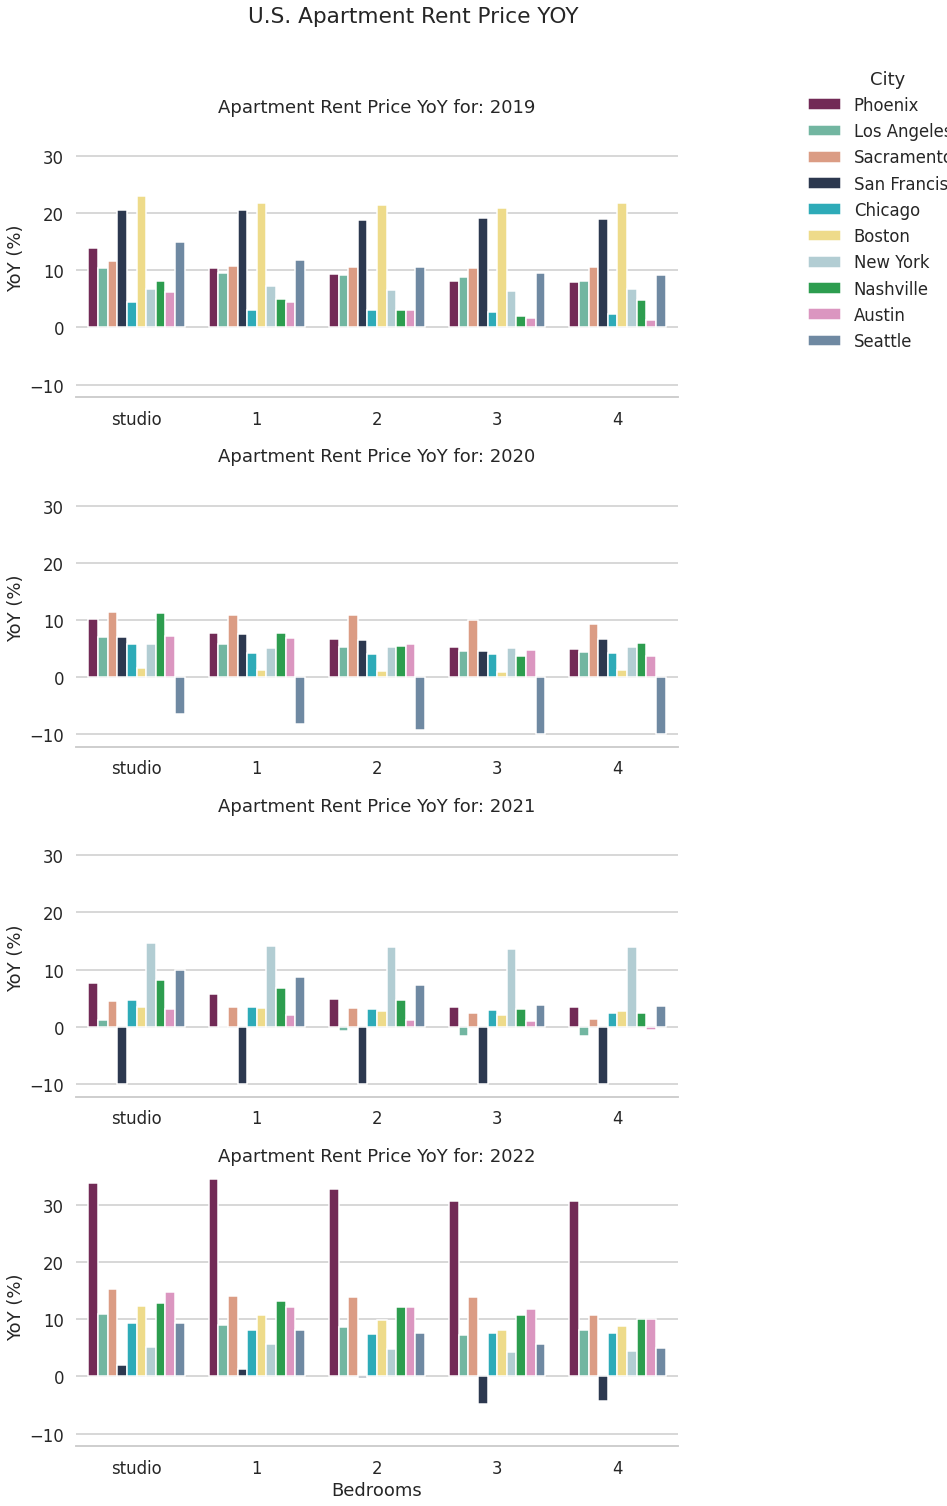

In [ ]:
colors = ["#7e1e59","#66c2a5","#ea9675","#263655","#17becf","#ffe579","#add0d8","#1ab048","#e78ac3","#668aaa"]
sns.set_palette(sns.color_palette(colors))

f = sns.catplot(data=yearly_df, x ='Bedrooms', y='YoY', kind='bar', col = 'Year', hue ='City',
            col_wrap= 1, sharex = False, height=5, aspect = 2)

f.despine(left=True)
f.fig.suptitle("U.S. Apartment Rent Price YOY", y=1.05)
f.set_titles("Apartment Rent Price YoY for: {col_name}")
f.set_axis_labels('Bedrooms','YoY (%)')
f.set_xticklabels(rotation = 'horizontal')
sns.move_legend(f, "center right",frameon=False, bbox_to_anchor = (1.1,0.9))

plt.show()

####Description of Key Findings for HUD dataset
##### Before the pandemic, from 2018 to 2019, rental price changes across bedroom types were approximately 5-23% for each of the top 10 cities selected for analysis; Boston had the highest price change and Chicago had the lowest price change. As the pandemic began, from 2019 to 2020, the price changes ranged from approximately –10% for Seattle, across all bedroom types, to approximately 11% for Sacramento. As the pandemic progressed from 2020 to 2021, the price changes declined significantly for Sacramento with a 10% decline. Additionally, Los Angeles experienced the second highest rent price decrease with an approximately –1% decline across all bedroom types which implies that it may have experienced a population decline resulting in a decrease in demand for rentals. From 2021 to 2022, Phoenix showed an over 30% increase in its rental price change, across all bedroom types, which suggests that there may have been a large increase in the population of residents seeking rental units which drove up the prices. In addition, San Francisco continued its decline in the 2-4 bedroom type category which hints at the possibility that larger families moved out of San Francisco leading to a decrease in rental prices for the 2-4 bedroom category. 


### 7.   Has the inflation rate affected housing inventory? (Askek)

### 8.   How has the cost of consumer goods changed? (Caprina)